In [10]:
# Clean up memory before (re)staring...
rm(list=ls())

# READ-ME
This is a the a Google Colab notebook for the class **Machine Learning in Bioinformatics** (BINF 6210/8210; Fall 2022). The runtime type of this notebook is `R`.

## Before anything else

You must look for the newest version of this course's syllabus and read it.

## Class details

- University: University of North Carolina at Charlotte (UNC Charlotte)
- College: College of Computing and Informatics
- Department: Department of Bioinformatics and Statistics
- Code: BINF 6210 / BINF 8210
- Name: Machine Learning for Bioinformatics (Machine Learning for Bioinformatics - 12328 - BINF 6210 - 001/ Machine Learning for Bioinformatics - 12329 - BINF 8210 - 001)
- Instructor: Denis Jacob Machado, Ph.D.
- Instructor's email: dmachado@uncc.edu
- Instructor's phone: 704-687-5765 (this number may change, please check for updates)
- Instructor's office: BINF 224 (this office may change, please check for updates)
- Locality: UNC Charlotte's Department of Bioinformatics and Genomics, room 301
- Time: 1:00 pm to 2:15 pm
- Date range: Aug 22, 2022 - Dec 15, 2022 (for approximately 16 weeks)
- Days of the week: TR (Tuesdays and Thursdays)
- Lecture Schedule Type/ Instructional Method: Face-to-Face Instruction Instructional Method
- Credits: 3.0 [credit hours](https://provost.charlotte.edu/policies-procedures/academic-policies-and-procedures/academic-credit-hour) (2,250 minutes of classroom or direct faculty instruction plus 4,500 minutes of out of class student work).

## Copyright

The instructor's lectures and course materials, including presentations, tests, exams, outlines, and similar materials, are protected by copyright. The instructor is the exclusive owner of copyright in those materials the instructor has created. The instructor encourage students to take notes and make copies of course materials for their educational use. However, students may not, nor may they knowingly allow others to reproduce or distribute lecture notes and course materials publicly without the instructor's express written consent. This includes providing materials to commercial course material suppliers such as CourseHero, Chegg, and other similar services. Students who publicly distribute or display or help others publicly distribute or display copies or modified copies of an instructor's course materials may be in violation of University Policy 406, The Code of Student Responsibility. Similarly, students own copyright in their original papers and exam essays. If the instructor is interested in posting the student's answers or papers on the course web site, the instructor will request the student's written permission.

## Availability

The original version of this Colab is available from https://colab.research.google.com/drive/1MMaEH4tOczOkykD6c56Qf_TTxxCe49o3?usp=sharing.

# Reference

This notebook is based on the book "Introduction to Machine Learning with R: Rigorous Mathematical Analysis" by Scott V. Burger (published in 2018 by O'Reilly, ISBN: 978-1-491-97644-9).

# Multiclass Classification

If you want to find splits in your data that define multiple classes and not just a binary classification, you need to use **multiclass classification**.

In multiclass classification you are applying the standard binary classification scheme but you are comparing the class we are interested in versus everything else.

In [11]:
#@title Here we create an example dataframe for multiclass classification
multi <- data.frame(
  x1 = c(
    0.03, 0.24, 0.21, 0.00, 0.00, 0.23, 0.60, 0.64, 0.86, 0.77
  ),
  x2 = c(
    0.07, 0.06, 0.19, 1.15, 0.95, 1.00, 0.81, 0.64, 0.44, 0.74
  ),
  lab = c(
    1,    1,    1,     2,   2,    2,     3,   3,    3,    3
  )
)

In [12]:
#@title This is how our example data looks like
multi

x1   x2   lab
1  0.03 0.07 1  
2  0.24 0.06 1  
3  0.21 0.19 1  
4  0.00 1.15 2  
5  0.00 0.95 2  
6  0.23 1.00 2  
7  0.60 0.81 3  
8  0.64 0.64 3  
9  0.86 0.44 3  
10 0.77 0.74 3

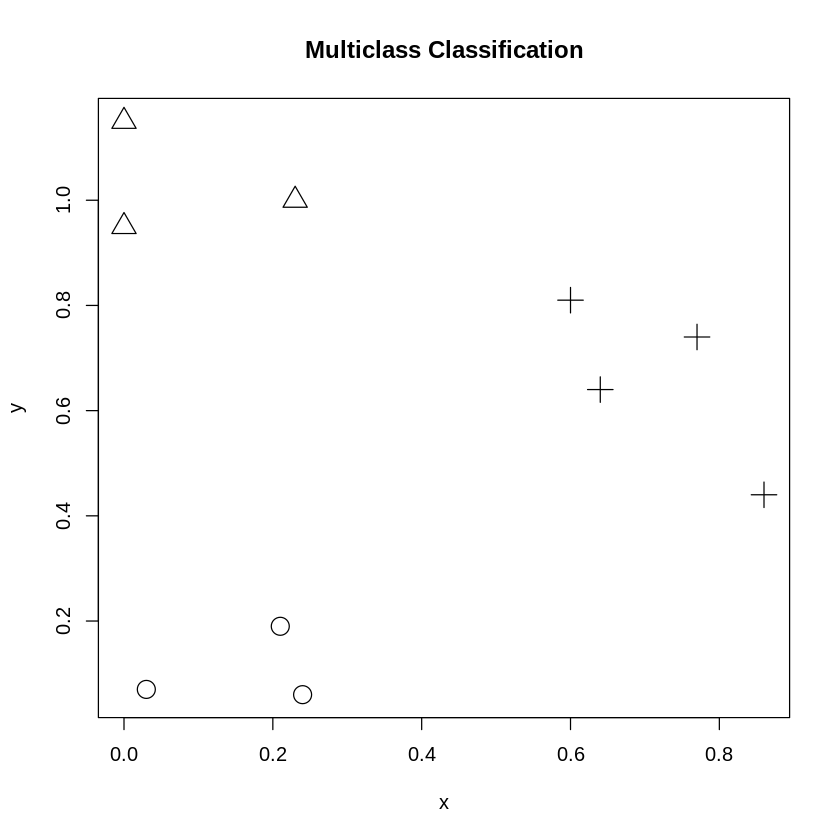

In [13]:
#@title Let us plot the example data
plot(
  x2 ~ x1,
  pch = lab,
  cex = 2,
  data = multi,
  main = "Multiclass Classification",
  xlab = "x",
  ylab = "y"
)

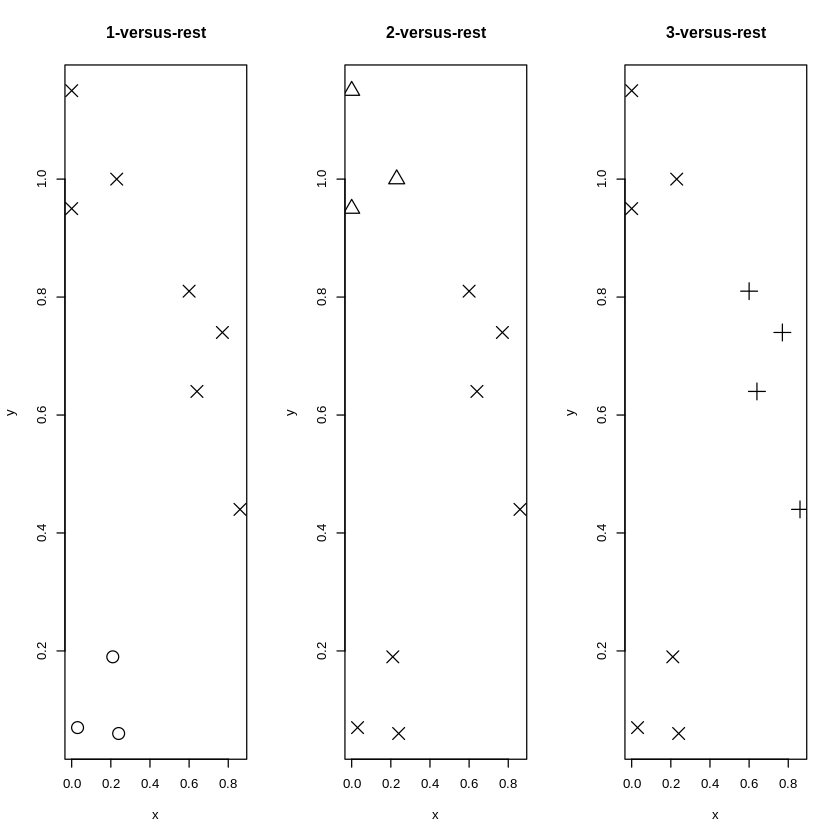

In [6]:
#@title One-versus-many classification
#@markdown There are three distict classes of data in the example dataframe called "multi." In multiclass classification we will compete class 1 versus the rest, class 2 versus the rest, and class 3 versus the reast (this is called a "one-versus-all" or "one-versus-many" approach).
par(mfrow = c(1, 3))
multi$lab2 <- c(1, 1, 1, 4, 4, 4, 4, 4, 4, 4)
plot(x2 ~ x1, pch = lab2, cex = 2, data = multi, main = "1-versus-rest", xlab = "x", ylab = "y")
multi$lab3 <- c(4, 4, 4, 2, 2, 2, 4, 4, 4, 4)
plot(x2 ~ x1, pch = lab3, cex = 2, data = multi, main = "2-versus-rest", xlab = "x", ylab = "y")
multi$lab4 <- c(4, 4, 4, 4, 4, 4, 3, 3, 3, 3)
plot(x2 ~ x1, pch = lab4, cex = 2, data = multi, main = "3-versus-rest", xlab = "x", ylab = "y")

## One-versus-many

In a one-versus-many classification apprach, you use one decision boundary to classify data for one type or class versus all the other types or classes. You then do that for all other types or classes. This way, you get as many decision boundaries as the number of types or classes.

In our example, by splitting a three-class problem into three two-class problems we can easily find a single decision boundary for each plot and then combine those decision boundaries for a final model.

In [14]:
#@title Usimg the "multinom" function
#@markdown You can use `multinom()` to pass a multinominal case that is basically the same as if you've done for the simple binary case, but there with three values instead of two. This methodology can be applied for more than three categories.
library(nnet)
multi.model <- multinom(
  lab ~ x2 + x1,
  data = multi,
  trace = F
)

In [15]:
#@markdown Notice that you have two lines separating the categories
multi.model

Call:
multinom(formula = lab ~ x2 + x1, data = multi, trace = F)

Coefficients:
  (Intercept)       x2        x1
2   -12.47452 28.50805 -17.97523
3   -19.82927 12.95949  33.39610

Residual Deviance: 0.0004050319 
AIC: 12.00041 

In [18]:
#@markdown Again, however, you need to do the special calculation for the slopes and intercept of the decision boundaries based on the output of this model.
# First calculation
multi.int.1 <- -coef(multi.model)[1] / coef(multi.model)[3]
multi.slope.1 <- -coef(multi.model)[5] / coef(multi.model)[3]
# Second calculation
multi.int.2 <- -coef(multi.model)[2] / coef(multi.model)[4]
multi.slope.2 <- -coef(multi.model)[6] / coef(multi.model)[4]

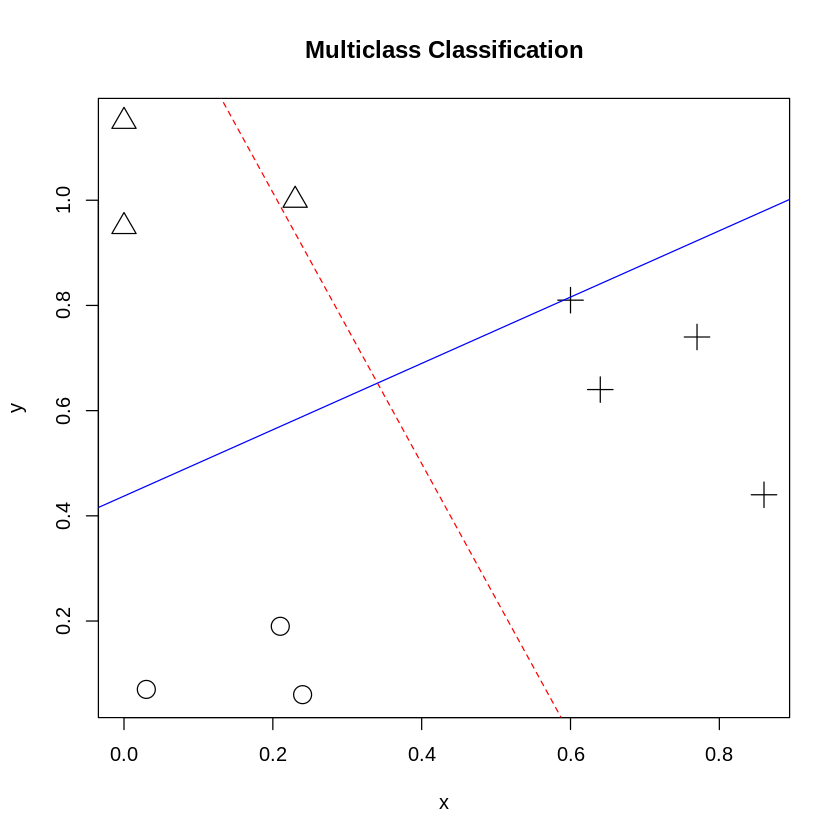

In [19]:
#@title Two lines separating three classes of data
plot(
  x2 ~ x1,
  pch = lab,
  cex = 2,
  data = multi,
  main = "Multiclass Classification",
  xlab = "x",
  ylab = "y"
)
abline(multi.int.1, multi.slope.1, col = "blue")
abline(multi.int.2, multi.slope.2, col = "red", lty = 2)

# Conclusion

In multiclass classification, we break the problem of classifying each class into several binary classifications, one per class.

For each new prediction, we can measure the score of that prediction as the distance of the data point from each decision boundary. The best score will determine to which class our data point most likelly belongs to.